**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**IMPORTING THE DATASET**

In [ ]:
data1=pd.read_csv("/content/train_v9rqX0R.csv")
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data2=pd.read_csv("/content/test_AbJTz2l.csv")
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**BASIC DETAILS**

In [ ]:
data1.shape

(8523, 12)

In [ ]:
data2.shape

(5681, 11)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
data1.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**PRE-PROCESSING**

**CHECKING NULL VALUES**

In [ ]:
data1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data2.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**FILLING NULL VALUES**

In [ ]:
xmean=data1['Item_Weight'].mean()
data1["Item_Weight"].fillna(xmean,inplace=True)


In [ ]:
xmode=data1['Outlet_Size'].mode()[0]
data1["Outlet_Size"].fillna(xmode, inplace=True)

In [ ]:
ymean=data2['Item_Weight'].mean()
data2["Item_Weight"].fillna(ymean,inplace=True)

In [ ]:
ymode=data2['Outlet_Size'].mode()[0]
data2["Outlet_Size"].fillna(ymode, inplace=True)

In [ ]:
data1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
data2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Checking outliers**

In [ ]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Text(0.5, 1.0, 'boxplot of Item_Weight')

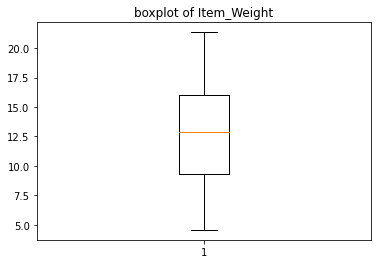

In [ ]:
plt.boxplot(data1['Item_Weight'])
plt.title('boxplot of Item_Weight')

Text(0.5, 1.0, 'boxplot of Item_Visibility')

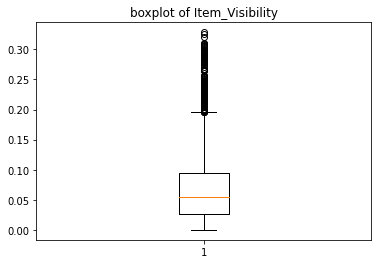

In [ ]:
plt.boxplot(data1['Item_Visibility'])
plt.title('boxplot of Item_Visibility')

In [ ]:
Q1 = np.percentile(data1['Item_Visibility'], 25, interpolation='midpoint')
Q2 = np.percentile(data1['Item_Visibility'], 50, interpolation='midpoint')
Q3 = np.percentile(data1['Item_Visibility'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [ ]:
outlier=[]
for x in data1['Item_Visibility']:
    if((x>Up_lim)or(x<low_lim)):
        outlier.append(x)


In [ ]:
outlier

[0.25539489600000004,
 0.293417759,
 0.278974075,
 0.291865402,
 0.2047,
 0.264124669,
 0.228993134,
 0.29788371199999997,
 0.23303981699999998,
 0.21037580600000003,
 0.22022560800000002,
 0.328390948,
 0.20529482699999999,
 0.247321039,
 0.21413978600000003,
 0.227189581,
 0.223440258,
 0.267352587,
 0.25637539,
 0.244102315,
 0.255348289,
 0.224837308,
 0.22417463,
 0.24554262699999999,
 0.23643360100000002,
 0.270300331,
 0.20471303600000001,
 0.32111501,
 0.248301532,
 0.274405193,
 0.20778348300000002,
 0.196438668,
 0.235354055,
 0.241055611,
 0.196490902,
 0.30374337,
 0.23212188,
 0.216323008,
 0.19842484100000002,
 0.213125482,
 0.237651344,
 0.22206335100000002,
 0.294939214,
 0.28406587899999997,
 0.234733477,
 0.309390255,
 0.277459381,
 0.21332355,
 0.253947823,
 0.203510667,
 0.23661675399999998,
 0.205605116,
 0.212963193,
 0.22846952199999998,
 0.23207267399999998,
 0.304859104,
 0.29182661600000004,
 0.242768664,
 0.29820527199999997,
 0.325780807,
 0.266234421,
 0.20

In [ ]:
ind1=data1['Item_Visibility']>Up_lim
in2=data1.loc[ind1].index
data1.drop(in2,inplace=True)

Text(0.5, 1.0, 'boxplot of Item_Visibility')

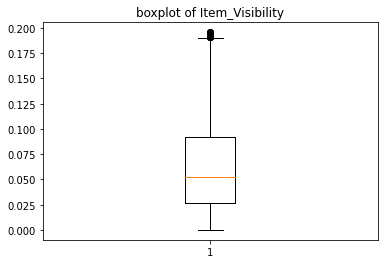

In [ ]:
plt.boxplot(data1['Item_Visibility'])
plt.title('boxplot of Item_Visibility')

Text(0.5, 1.0, 'boxplot of Item_MRP')

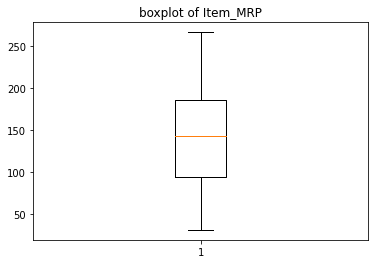

In [ ]:
plt.boxplot(data1['Item_MRP'])
plt.title('boxplot of Item_MRP')

Text(0.5, 1.0, 'boxplot of Outlet_Establishment_Year')

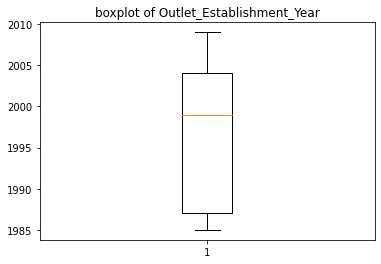

In [ ]:
plt.boxplot(data1['Outlet_Establishment_Year'])
plt.title('boxplot of Outlet_Establishment_Year')


Text(0.5, 1.0, 'boxplot of Item_Outlet_Sales')

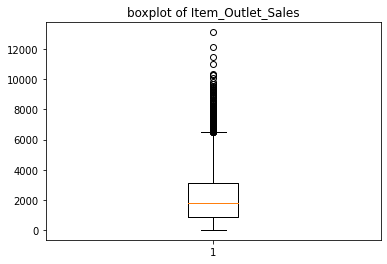

In [ ]:
plt.boxplot(data1['Item_Outlet_Sales'])
plt.title('boxplot of Item_Outlet_Sales')

In [ ]:
Q1 = np.percentile(data1['Item_Outlet_Sales'], 25, interpolation='midpoint')
Q2 = np.percentile(data1['Item_Outlet_Sales'], 50, interpolation='midpoint')
Q3 = np.percentile(data1['Item_Outlet_Sales'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [ ]:
outlier=[]
for x in data1['Item_Outlet_Sales']:
    if((x>Up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[6768.5228,
 7968.2944,
 6976.2524,
 7370.406,
 6704.606,
 6795.1548,
 7222.5984,
 7298.4996,
 7452.9652,
 7696.648,
 9267.936,
 7763.228,
 6911.004,
 6687.960999999999,
 9158.079,
 8114.7704,
 7094.7648,
 7192.6374,
 6611.394,
 7443.644,
 7488.9184,
 7833.8028,
 7759.899,
 6515.5188,
 7017.531999999999,
 7370.406,
 9133.4444,
 9275.9256,
 10236.675,
 6622.7126,
 7152.0236,
 7296.5022,
 6767.1912,
 6872.3876,
 7472.2734,
 8132.0812,
 6897.688,
 11445.101999999999,
 7646.0472,
 6668.6528,
 6574.775,
 6942.9624,
 7073.4592,
 7130.718000000001,
 6771.186,
 7116.0704,
 6524.84,
 6769.8544,
 6692.6216,
 6615.3888,
 7504.2318,
 7086.1094,
 7168.6686,
 6751.2119999999995,
 8239.9408,
 9371.8008,
 8851.1452,
 7478.2656,
 8604.7992,
 7590.12,
 6503.5344,
 8760.5964,
 6796.4864,
 7201.2928,
 6852.4136,
 6729.9064,
 7931.6754,
 6729.9064,
 7142.7024,
 6893.0274,
 7534.1928,
 7843.124,
 9467.676,
 8912.3988,
 6757.87,
 7247.233,
 7503.566,
 7247.233,
 8138.7392,
 7033.5112,
 7334.4528,
 6972.2576,

In [ ]:
ind1=data1['Item_Outlet_Sales']>Up_lim
in2=data1.loc[ind1].index
data1.drop(in2,inplace=True)

Text(0.5, 1.0, 'boxplot of Item_Outlet_Sales')

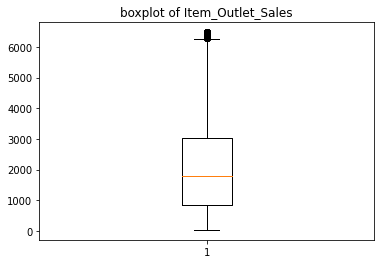

In [ ]:
plt.boxplot(data1['Item_Outlet_Sales'])
plt.title('boxplot of Item_Outlet_Sales')

In [ ]:
data2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Text(0.5, 1.0, 'boxplot of Item_Weight')

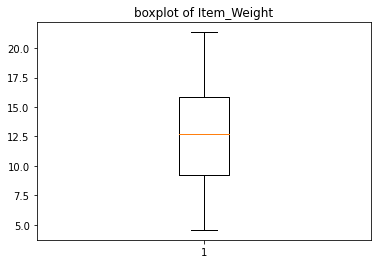

In [ ]:
plt.boxplot(data2['Item_Weight'])
plt.title('boxplot of Item_Weight')

Text(0.5, 1.0, 'boxplot of Item_Visibility')

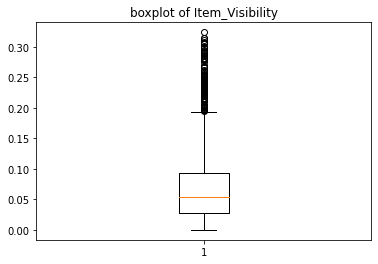

In [ ]:
plt.boxplot(data2['Item_Visibility'])
plt.title('boxplot of Item_Visibility')

In [ ]:
Q1 = np.percentile(data2['Item_Visibility'], 25, interpolation='midpoint')
Q2 = np.percentile(data2['Item_Visibility'], 50, interpolation='midpoint')
Q3 = np.percentile(data2['Item_Visibility'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [ ]:
outlier=[]
for x in data2['Item_Visibility']:
    if((x>Up_lim)or(x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[0.196897637,
 0.291322397,
 0.29954415300000004,
 0.24617825699999998,
 0.262504325,
 0.238990225,
 0.21676258399999998,
 0.23372937,
 0.19596346399999998,
 0.197679823,
 0.280083047,
 0.279663801,
 0.214306131,
 0.268966279,
 0.229678918,
 0.203400773,
 0.310376916,
 0.22447215899999998,
 0.209684121,
 0.203536932,
 0.28704117,
 0.274592283,
 0.308258994,
 0.249342884,
 0.201643565,
 0.242768664,
 0.224830093,
 0.22022101100000002,
 0.21956811199999998,
 0.277579189,
 0.253421913,
 0.23956881100000002,
 0.203400773,
 0.285077835,
 0.281955554,
 0.227609738,
 0.23772572600000003,
 0.20294826800000001,
 0.256919126,
 0.294472634,
 0.225662275,
 0.20473381,
 0.19982598699999998,
 0.253947823,
 0.23886850899999998,
 0.223633668,
 0.267753377,
 0.196267755,
 0.267701662,
 0.222132498,
 0.23024692800000002,
 0.323637245,
 0.267106722,
 0.247843179,
 0.214952566,
 0.226084177,
 0.21572828800000002,
 0.196572047,
 0.238579765,
 0.20192757,
 0.212767095,
 0.267339659,
 0.215072945,
 0.3135415

In [ ]:
ind1=data2['Item_Visibility']>Up_lim
in2=data2.loc[ind1].index
data2.drop(in2,inplace=True)

Text(0.5, 1.0, 'boxplot of Item_Visibility')

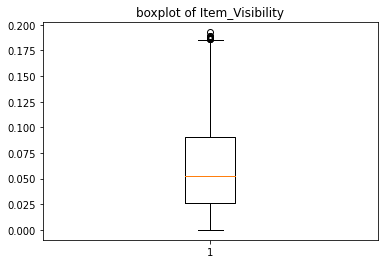

In [ ]:
plt.boxplot(data2['Item_Visibility'])
plt.title('boxplot of Item_Visibility')

Text(0.5, 1.0, 'boxplot of Item_MRP')

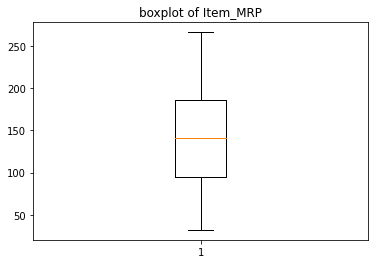

In [ ]:
plt.boxplot(data2['Item_MRP'])
plt.title('boxplot of Item_MRP')

Text(0.5, 1.0, 'boxplot of Outlet_Establishment_Year')

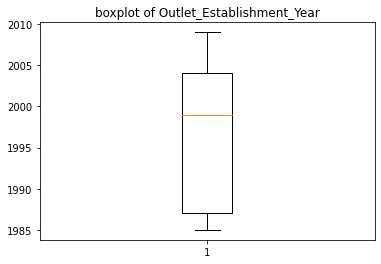

In [ ]:
plt.boxplot(data2['Outlet_Establishment_Year'])
plt.title('boxplot of Outlet_Establishment_Year')

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


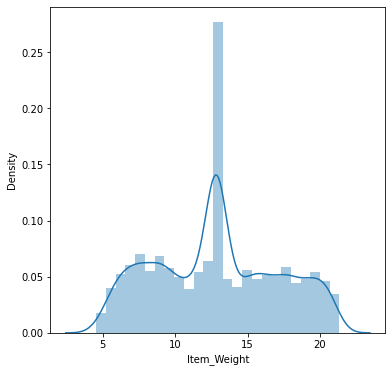

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data1['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


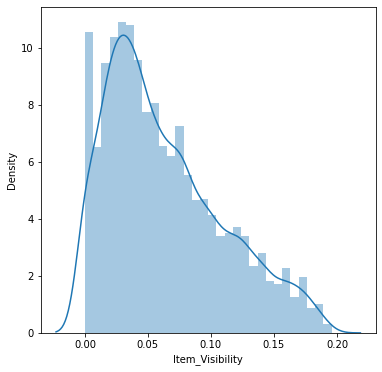

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(data1['Item_Visibility'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


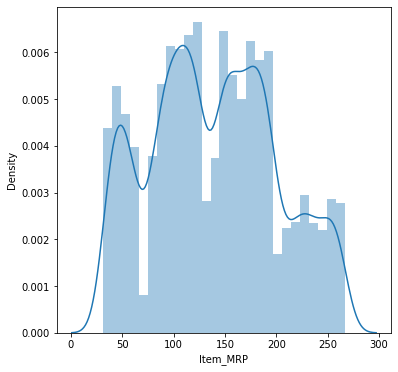

In [ ]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data1['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


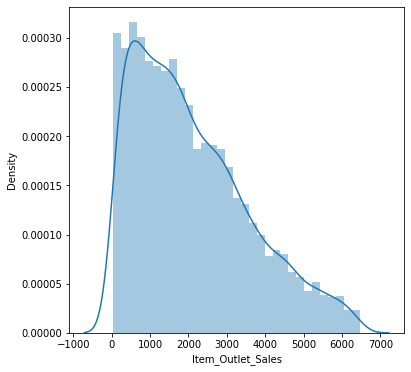

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(data1['Item_Outlet_Sales'])
plt.show()

**Encoding**

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1['Item_Identifier'].value_counts()

FDW13    10
NCB18     9
NCJ30     9
NCY18     9
FDO19     9
         ..
FDT35     1
DRG25     1
FDK57     1
FDE52     1
DRE01     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
a=['Item_Identifier']
for i in np.arange(len(a)):
     data1[a[i]]=lblencoder.fit_transform(data1[a[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1['Item_Fat_Content'].value_counts()

Low Fat    4898
Regular    2769
LF          304
reg         115
low fat     107
Name: Item_Fat_Content, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
b=['Item_Fat_Content']
for i in np.arange(len(b)):
     data1[b[i]]=lblencoder.fit_transform(data1[b[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1['Item_Type'].value_counts()

Fruits and Vegetables    1175
Snack Foods              1154
Household                 877
Frozen Foods              830
Dairy                     649
Canned                    626
Baking Goods              622
Health and Hygiene        507
Soft Drinks               428
Meat                      409
Breads                    242
Hard Drinks               207
Others                    167
Starchy Foods             139
Breakfast                 101
Seafood                    60
Name: Item_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
c=['Item_Type']
for i in np.arange(len(c)):
     data1[c[i]]=lblencoder.fit_transform(data1[c[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,1,0.000000,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1['Outlet_Identifier'].value_counts()

OUT018    925
OUT046    920
OUT045    920
OUT049    919
OUT013    917
OUT035    914
OUT017    907
OUT027    832
OUT010    488
OUT019    451
Name: Outlet_Identifier, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
d=['Outlet_Identifier']
for i in np.arange(len(d)):
     data1[d[i]]=lblencoder.fit_transform(data1[d[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1['Outlet_Size'].value_counts()

Medium    4991
Small     2285
High       917
Name: Outlet_Size, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
e=['Outlet_Size']
for i in np.arange(len(e)):
     data1[e[i]]=lblencoder.fit_transform(data1[e[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,Tier 1,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,Tier 3,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,Tier 1,Supermarket Type1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,Tier 3,Grocery Store,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,Tier 3,Supermarket Type1,994.7052


In [ ]:
data1['Outlet_Location_Type'].value_counts()

Tier 3    3162
Tier 2    2741
Tier 1    2290
Name: Outlet_Location_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
f=['Outlet_Location_Type']
for i in np.arange(len(f)):
     data1[f[i]]=lblencoder.fit_transform(data1[f[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,Grocery Store,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052


In [ ]:
data1['Outlet_Type'].value_counts()

Supermarket Type1    5497
Grocery Store         939
Supermarket Type2     925
Supermarket Type3     832
Name: Outlet_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
g=['Outlet_Type']
for i in np.arange(len(g)):
     data1[g[i]]=lblencoder.fit_transform(data1[g[i]])

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
data2['Item_Identifier'].value_counts()

FDQ60    8
DRF48    8
NCS41    8
FDK57    8
FDP15    8
        ..
FDB36    1
FDD38    1
NCI54    1
FDR48    1
NCI29    1
Name: Item_Identifier, Length: 1541, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
a=['Item_Identifier']
for i in np.arange(len(a)):
     data2[a[i]]=lblencoder.fit_transform(data2[a[i]])

In [ ]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1101,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,1065,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,1404,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,808,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,1182,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
data2['Item_Fat_Content'].value_counts()

Low Fat    3339
Regular    1890
LF          200
reg          74
low fat      65
Name: Item_Fat_Content, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
b=['Item_Fat_Content']
for i in np.arange(len(b)):
     data2[b[i]]=lblencoder.fit_transform(data2[b[i]])

In [ ]:
data2['Item_Type'].value_counts()

Snack Foods              768
Fruits and Vegetables    765
Household                631
Frozen Foods             549
Dairy                    446
Baking Goods             433
Canned                   423
Health and Hygiene       333
Meat                     308
Soft Drinks              278
Breads                   160
Hard Drinks              145
Starchy Foods            119
Others                   110
Breakfast                 75
Seafood                   25
Name: Item_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
c=['Item_Type']
for i in np.arange(len(c)):
     data2[c[i]]=lblencoder.fit_transform(data2[c[i]])

In [ ]:
data2['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT046    620
OUT035    620
OUT049    620
OUT045    619
OUT018    618
OUT017    617
OUT010    313
OUT019    296
Name: Outlet_Identifier, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
d=['Outlet_Identifier']
for i in np.arange(len(d)):
     data2[d[i]]=lblencoder.fit_transform(data2[d[i]])

In [ ]:
data2['Outlet_Size'].value_counts()

Medium    3411
Small     1536
High       621
Name: Outlet_Size, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
e=['Outlet_Size']
for i in np.arange(len(e)):
     data2[e[i]]=lblencoder.fit_transform(data2[e[i]])

In [ ]:
data2['Outlet_Location_Type'].value_counts()

Tier 3    2176
Tier 2    1856
Tier 1    1536
Name: Outlet_Location_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
f=['Outlet_Location_Type']
for i in np.arange(len(f)):
     data2[f[i]]=lblencoder.fit_transform(data2[f[i]])

In [ ]:
data2['Outlet_Type'].value_counts()

Supermarket Type1    3717
Supermarket Type3     624
Supermarket Type2     618
Grocery Store         609
Name: Outlet_Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()
g=['Outlet_Type']
for i in np.arange(len(g)):
     data2[g[i]]=lblencoder.fit_transform(data2[g[i]])

In [ ]:
data2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1101,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1065,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1404,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,808,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1182,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
from sklearn.preprocessing import OneHotEncoder
train_data=pd.get_dummies(data1)
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
from sklearn.preprocessing import OneHotEncoder
test_data=pd.get_dummies(data2)
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1101,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1065,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1404,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,808,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1182,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


## **Correlation matrix**

In [1]:
corr = train_data.corr()
plt.subplots(figsize=(24,10))
sns.heatmap(corr,annot=True)

NameError: ignored

In [ ]:
X = data1.drop(['Item_Outlet_Sales'], axis=1)
Y = data1['Item_Outlet_Sales']

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

**Modelling**

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("MSE of Linear regressor is :",mean_squared_error(Y_test,y_pred))
print("R squared value of Linear regressor is :",r2_score(Y_test,y_pred))
print("MAE of Linear regressor is :",mean_absolute_error(Y_test,y_pred))
print("RMSE of Linear regressor is",math.sqrt(mean_squared_error(Y_test,y_pred)))

In [ ]:
data2.to_csv('submission1.csv',index=False)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
y_pred= dt.predict(X_test)
print("MSE of decison tree regressor is :",mean_squared_error(Y_test,y_pred))
print("R squared value of decison tree regressor is :",r2_score(Y_test,y_pred))
print("MAE of decison tree regressor is :",mean_absolute_error(Y_test,y_pred))
print("RMSE of decison tree regressor is",math.sqrt(mean_squared_error(Y_test,y_pred)))


In [ ]:
data2.to_csv('submission2.csv',index=False)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor=RandomForestRegressor()
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)
print("MSE of Random forest regressor is :",mean_squared_error(Y_test,y_pred))
print("R squared value of Random forest regressor is :",r2_score(Y_test,y_pred))
print("MAE of Random forest regressor is :",mean_absolute_error(Y_test,y_pred))
print("RMSE of Random forest regressor is",math.sqrt(mean_squared_error(Y_test,y_pred)))

In [ ]:
data2.to_csv('submission3.csv',index=False)

Gradiant Booster

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("MSE of Gradient boosting regressor is :",mean_squared_error(Y_test,y_pred))
print("R squared value of Gradient boosting regressor is :",r2_score(Y_test,y_pred))
print("MAE of Gradient boosting regressor is :",mean_absolute_error(Y_test,y_pred))
print("RMSE of Gradient boosting regressor is",math.sqrt(mean_squared_error(Y_test,y_pred)))

In [ ]:
data2.to_csv('submission4.csv',index=False)

XGBRegressor

In [ ]:
import xgboost as xgb
#from sklearn.ensemble import XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=5,n_estimators=200,learning_rate=0.05,random_state=1,booster='gbtree')
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print("MSE of Extreme Gradient boosting regressor is :",mean_squared_error(Y_test,y_pred))
print("R squared value of Extreme Gradient boosting regressor is :",r2_score(Y_test,y_pred))
print("MAE of Extreme Gradient boosting regressor is :",mean_absolute_error(Y_test,y_pred))
print("RMSE of Extreme Gradient boosting regressor is",math.sqrt(mean_squared_error(Y_test,y_pred)))

In [ ]:
data2.to_csv('submission5.csv',index=False)